# Microsoft Security Incident Prediction

This notebook provides a comprehensive workflow for predicting security incidents using a real-world dataset from Microsoft. The process includes:

1. **Data Acquisition**: Downloading the relevant CSV file containing cybersecurity incident data.
2. **Data Preprocessing**: Cleaning and preparing the dataset for analysis, including handling missing values, encoding categorical variables, and scaling numerical features.
3. **Data Exploration**: Exploring the dataset to gain insights into its structure, identifying patterns and correlations, and assessing the distribution of key features.IncidentGrade
4. **Visualizations**: Creating various plots to visualize trends and relationships in the data, which helps in understanding the underlying patterns that could inform predictive models.

By the end of this notebook, we will have clean, stratified, and reduced datasets ready for model training and evaluation.

Before proceeding with the download, we would like to mention that the original dataset contains two types of files: GUIDE_train and GUIDE_test. These files are large in terms of the number of rows. To carry out this project, we will use only a part of the data due to time complexity when training the models. In particular, we reduce the data to only 10,000 rows from the GUIDE_train file for training, while the GUIDE_test file will remain untouched.

In [75]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from kagglehub import dataset_download
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Downloading the Data from Kaggle

In [76]:
def create_reduced_file(original_file_path, reduced_file_path, target_column, sample_size=10000):
    """
    Creates a reduced file from the original file by applying stratified undersampling.

    :param original_file_path: Path to the original file.
    :param reduced_file_path: Path where the reduced file will be saved.
    :param target_column: Name of the target column for stratification.
    :param sample_size: Size of the reduced dataset.
    """
    df_original = pd.read_csv(original_file_path)
    print(f"The original file has {len(df_original)} rows.")
    
    # Perform stratified undersampling
    df_reduced, _ = train_test_split(
        df_original,
        train_size=sample_size,
        stratify=df_original[target_column],
        random_state=42
    )
    
    df_reduced.to_csv(reduced_file_path, index=False)
    print(f"Reduced file created with {len(df_reduced)} rows, maintaining class proportions.")

In [77]:
# Path Configuration
dataset_folder = os.getcwd()
reduced_file_path = os.path.join(dataset_folder, 'microsoft_Reduced.csv')

if not os.path.exists(reduced_file_path):
    file_path = dataset_download("Microsoft/microsoft-security-incident-prediction")
    original_file_path = os.path.join(file_path, "GUIDE_Train.csv")
    create_reduced_file(original_file_path, reduced_file_path, target_column='IncidentGrade')
else:
    data = pd.read_csv(reduced_file_path)
    print(f"File loaded with {len(df_reduced)} rows.")

File loaded with 10000 rows.


Let's take an initial look of our reduced dataset.

In [78]:
data.describe(include='all')

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
count,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000,10000.000000,10000.000000,10000,4534,10000,...,280,10000.000000,10000.000000,175,1571,2398,10000.000000,10000.000000,10000.000000,10000
unique,NaN,NaN,NaN,NaN,9273,NaN,NaN,17,186,3,...,6,NaN,NaN,2,2,3,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,2024-06-11T22:02:45.000Z,NaN,NaN,InitialAccess,T1078;T1078.004,BenignPositive,...,Contextual,NaN,NaN,Inbound,Suspicious,Suspicious,NaN,NaN,NaN,Public
freq,NaN,NaN,NaN,NaN,28,NaN,NaN,4741,1518,4226,...,155,NaN,NaN,159,1570,1546,NaN,NaN,NaN,7019
mean,8.480207e+11,174.001700,68409.706600,4.089517e+05,NaN,98.297200,2389.946000,NaN,NaN,NaN,...,NaN,4.900000,64.681100,NaN,NaN,NaN,221.949600,1344.955300,9885.725600,NaN
std,4.903338e+11,367.429485,117319.419739,4.540566e+05,NaN,415.670435,9948.962346,NaN,NaN,NaN,...,NaN,0.698748,9.227444,NaN,NaN,NaN,65.395343,362.129106,2696.602795,NaN
min,1.840000e+02,0.000000,3.000000,0.000000e+00,NaN,0.000000,0.000000,NaN,NaN,NaN,...,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,4.209068e+11,8.000000,421.000000,2.532625e+04,NaN,2.000000,2.000000,NaN,NaN,NaN,...,NaN,5.000000,66.000000,NaN,NaN,NaN,242.000000,1445.000000,10630.000000,NaN
50%,8.418136e+11,43.000000,9179.500000,2.279270e+05,NaN,7.000000,8.000000,NaN,NaN,NaN,...,NaN,5.000000,66.000000,NaN,NaN,NaN,242.000000,1445.000000,10630.000000,NaN
75%,1.271310e+12,172.000000,82105.750000,6.715730e+05,NaN,39.000000,97.000000,NaN,NaN,NaN,...,NaN,5.000000,66.000000,NaN,NaN,NaN,242.000000,1445.000000,10630.000000,NaN


In [79]:
data.shape

(10000, 46)

In [80]:
data.dtypes

Id                      int64
OrgId                   int64
IncidentId              int64
AlertId                 int64
Timestamp              object
DetectorId              int64
AlertTitle              int64
Category               object
MitreTechniques        object
IncidentGrade          object
ActionGrouped          object
ActionGranular         object
EntityType             object
EvidenceRole           object
DeviceId                int64
Sha256                  int64
IpAddress               int64
Url                     int64
AccountSid              int64
AccountUpn              int64
AccountObjectId         int64
AccountName             int64
DeviceName              int64
NetworkMessageId        int64
EmailClusterId        float64
RegistryKey             int64
RegistryValueName       int64
RegistryValueData       int64
ApplicationId           int64
ApplicationName         int64
OAuthApplicationId      int64
ThreatFamily           object
FileName                int64
FolderPath

We can observe that there are numerical and categorical variables, so later we will prepare them to be treated for the models.

Now we can proceed with applying the preprocessing to the data. Before that, let's split the data into training and testing sets.

In [81]:
data_train, data_test = train_test_split(data, test_size=0.3, random_state=42)

data_train.shape, data_test.shape

((7000, 46), (3000, 46))

## Data Preprocessing

### Removal of irrelevant features

Our first step is to remove those features that are type of id, particulary we remove;
1. Id (Unique ID for each OrgId–IncidentId pair)
2. OrgId (Organization identifier)
3. IncidentId (Organizationally unique incident identifier)
4. AlertId (Unique identifier for an alert)
5. DetectorId (Unique ID for the alert-generating detector)
6. DeviceId (Unique identifier for the device).
7. AccountUpn (Email account identifier).
8. EmailClusterId (Unique identifier for the email cluster)
9. NetworkMessageId (Org-level identifier for email message)
10. OAuthApplicationId (OAuth application identifier)

We think these are not useful when predicting.

In [85]:
data_train.drop(columns=[
    'Id',
    'OrgId',
    'IncidentId',
    'AlertId',
    'DetectorId',
    'DeviceId',
    'AccountUpn',
    'EmailClusterId',
    'NetworkMessageId',
    'OAuthApplication'
], inplace=True)


In [86]:
data_train.nunique()

Timestamp             6598
AlertTitle            1437
Category                16
MitreTechniques        162
IncidentGrade            3
ActionGrouped            0
ActionGranular           0
EntityType              18
EvidenceRole             2
Sha256                 393
IpAddress             1336
Url                    442
AccountSid            1584
AccountObjectId       1567
AccountName           1660
DeviceName             570
RegistryKey              8
RegistryValueName        6
RegistryValueData        5
ApplicationId           11
ApplicationName         16
OAuthApplicationId       2
ThreatFamily            34
FileName               534
FolderPath             315
ResourceIdName           2
ResourceType             1
Roles                    6
OSFamily                 4
OSVersion                6
AntispamDirection        2
SuspicionLevel           2
LastVerdict              3
CountryCode             62
State                  132
City                   174
Usage                    2
d

In [89]:
data_train.columns

Index(['Timestamp', 'AlertTitle', 'Category', 'MitreTechniques',
       'IncidentGrade', 'ActionGrouped', 'ActionGranular', 'EntityType',
       'EvidenceRole', 'Sha256', 'IpAddress', 'Url', 'AccountSid',
       'AccountObjectId', 'AccountName', 'DeviceName', 'RegistryKey',
       'RegistryValueName', 'RegistryValueData', 'ApplicationId',
       'ApplicationName', 'OAuthApplicationId', 'ThreatFamily', 'FileName',
       'FolderPath', 'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily',
       'OSVersion', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict',
       'CountryCode', 'State', 'City', 'Usage'],
      dtype='object')

Let's now explore the null values.

In [118]:
columns_with_missing = data_train.columns[data_train.isnull().any()]

for column in columns_with_missing:
    num_missing = data_train[column].isnull().sum()
    print(f"{column}: {data_train[column].dtype}, Missing values = {num_missing}")

MitreTechniques: object, Missing values = 3822
ActionGrouped: object, Missing values = 7000
ActionGranular: object, Missing values = 7000
ThreatFamily: object, Missing values = 6961
ResourceType: object, Missing values = 6999
Roles: object, Missing values = 6805
AntispamDirection: object, Missing values = 6874
SuspicionLevel: object, Missing values = 5910
LastVerdict: object, Missing values = 5321


Vemos que todos los valores faltantes son categoricas.

Let's analize if we can do imputation over the missing values for each features where are missing

### Simple Methodology for Handling Missing Values:

1. **Remove of columns with missing values > 90%**:
   - If a column more than 80, we have decided to remove it, we also consider the previsualization and display of numbers of that column in Kaggle. This is simple and prevents the complexity of imputing values.

2. **Imputation with the mode or mean**:
   - For columns with a small number of missing values, the simplest approach is to replace the missing values with the mode (for categorical variables) or the mean (for numerical variables). This ensures that data is not lost while keeping things simple.

This methodology is effective in many cases and avoids complexity, although it may not be ideal for all situations, especially when missing data is not missing at random.


Before removing, let's analyze if there is a pattern between the two features with missing values.

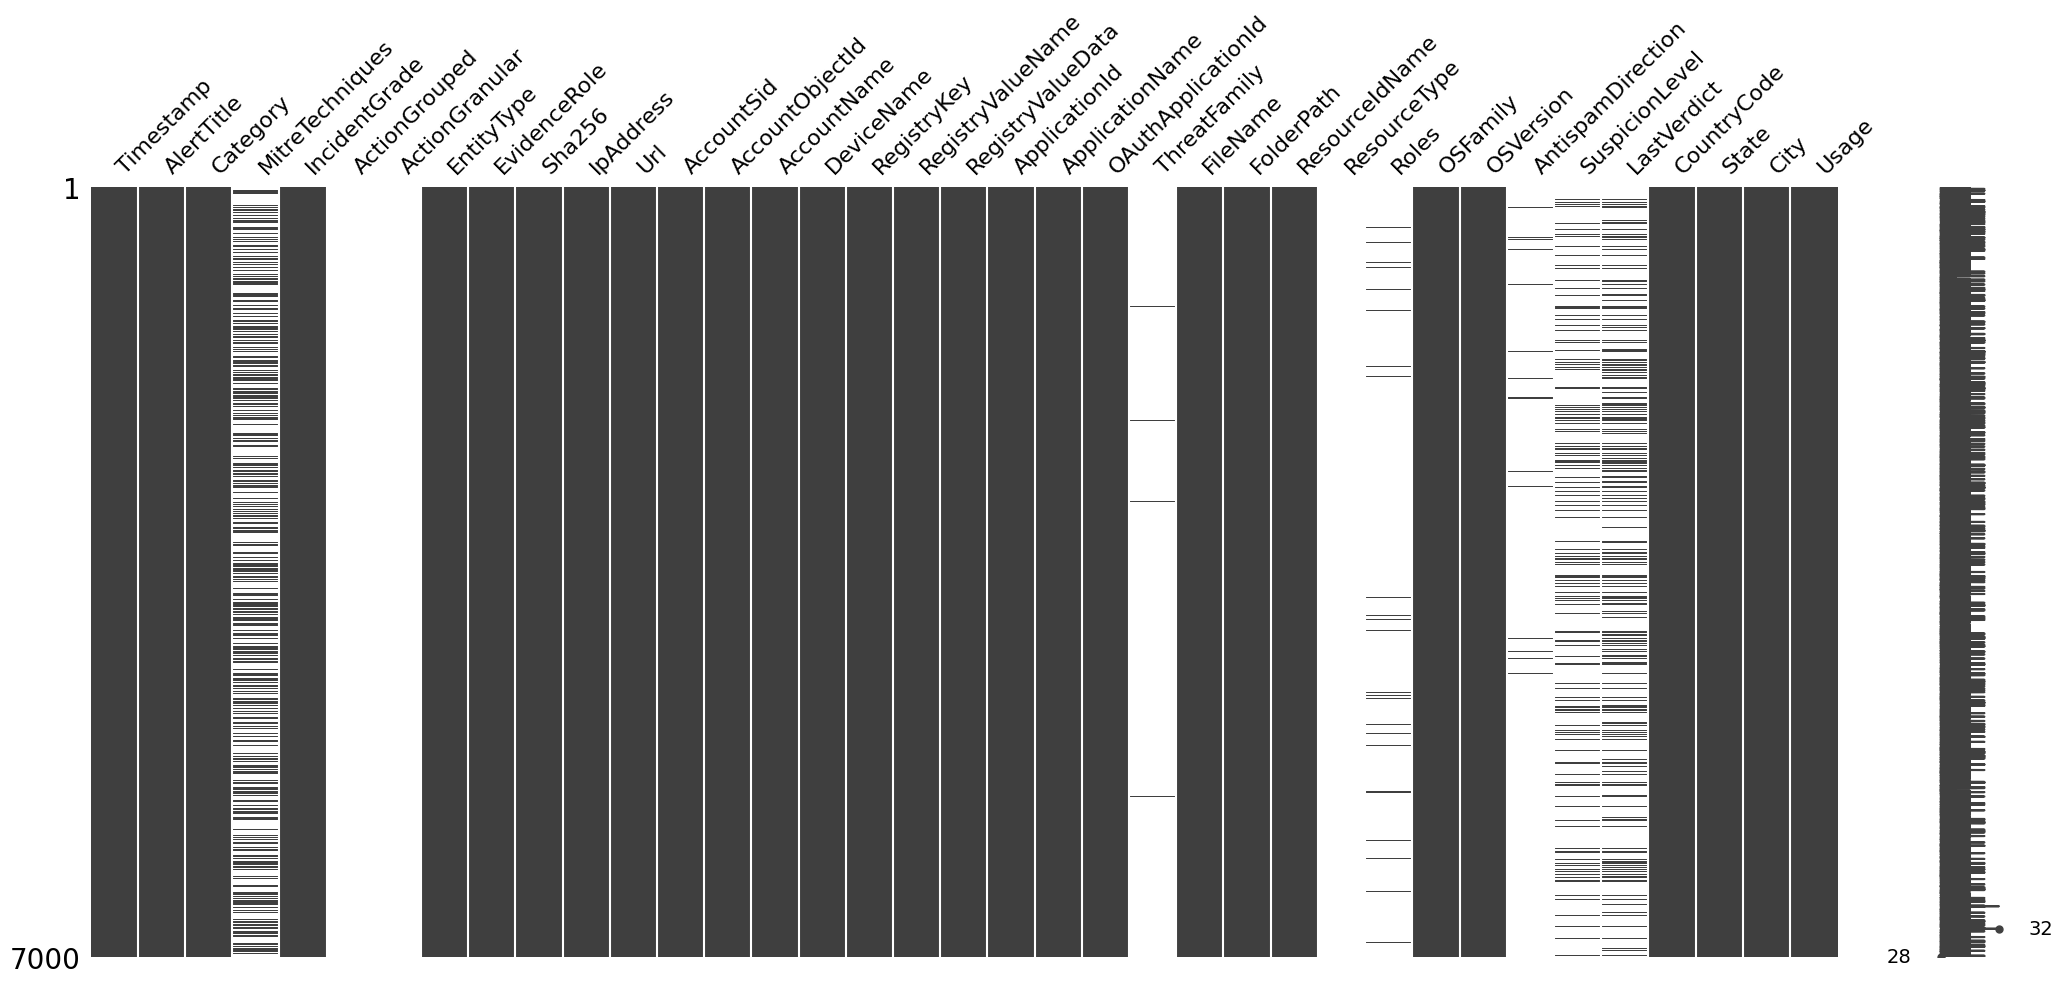

In [124]:
import missingno as msno
msno.matrix(data_train);

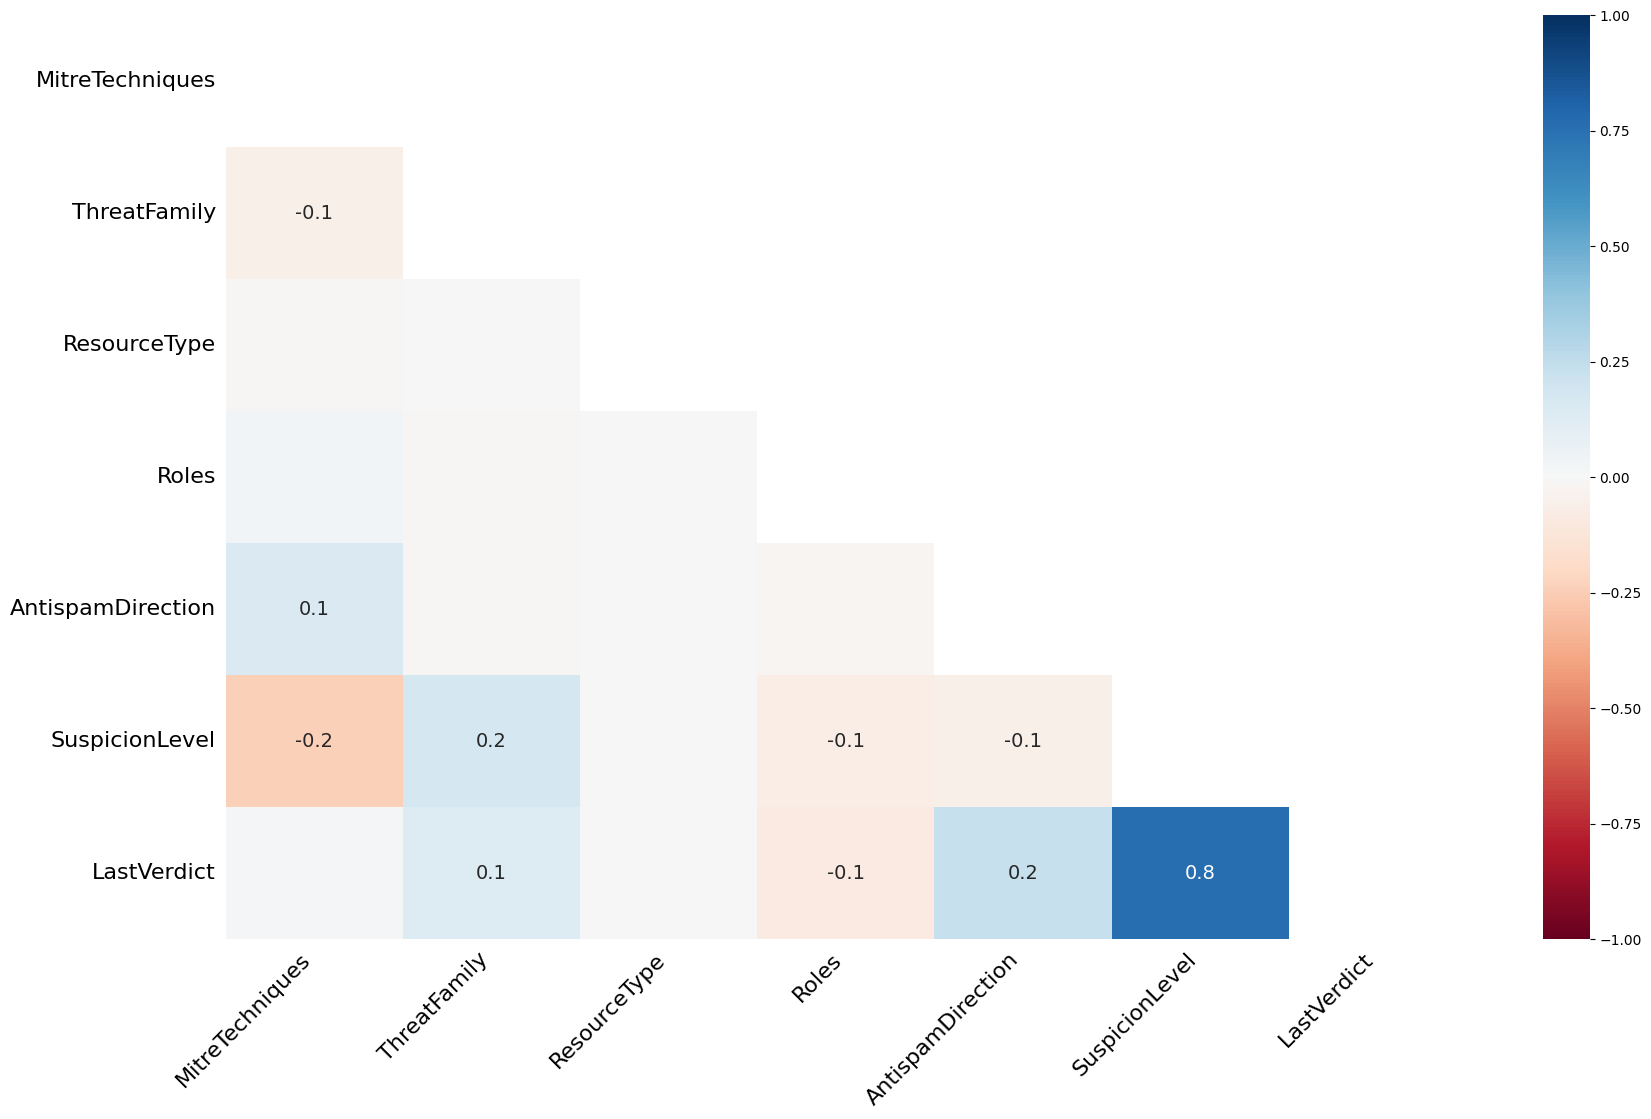

In [125]:
import missingno as msno
msno.heatmap(data_train);

The first observation is that "LastVerdict" is correlated with "SuspicionLevel." AQUI HEMOS DE HACER ALGO

### Removing features
Now we are going to proceed to remove those features that has more then 90% of missing values.

In [136]:
missing_percentages = data_train.isnull().mean() * 100
columns_to_drop = missing_percentages[missing_percentages > 90].index
print("Columns with more than 90% missing values:")
for column in columns_to_drop:
    print(f"{column}: {missing_percentages[column]:.2f}% missing")
data_train = data_train.drop(columns=columns_to_drop)
print(f"\nNumber of columns removed: {len(columns_to_drop)}")


Columns with more than 90% missing values:
ActionGrouped: 100.00% missing
ActionGranular: 100.00% missing
ThreatFamily: 99.44% missing
ResourceType: 99.99% missing
Roles: 97.21% missing
AntispamDirection: 98.20% missing

Number of columns removed: 6


In [138]:
data_train.isnull().sum()

Timestamp                0
AlertTitle               0
Category                 0
MitreTechniques       3822
IncidentGrade            0
EntityType               0
EvidenceRole             0
Sha256                   0
IpAddress                0
Url                      0
AccountSid               0
AccountObjectId          0
AccountName              0
DeviceName               0
RegistryKey              0
RegistryValueName        0
RegistryValueData        0
ApplicationId            0
ApplicationName          0
OAuthApplicationId       0
FileName                 0
FolderPath               0
ResourceIdName           0
OSFamily                 0
OSVersion                0
SuspicionLevel        5910
LastVerdict           5321
CountryCode              0
State                    0
City                     0
Usage                    0
dtype: int64

### Transforming Categorical Values

In [140]:
print(data_train.shape)
df_encoded = pd.get_dummies(data_train, drop_first=True)
df_encoded.shape

(7000, 31)


(7000, 6819)

### Why One-Hot Encoding May Not Be Ideal

One-Hot Encoding can drastically increase the number of features in the dataset. In this case, applying it to categorical columns with many unique values causes the dataset to expand from 31 columns to 6819. This can lead to several issues:

1. **Increased Dimensionality**: A massive increase in columns can cause higher computational cost, longer training times, and make models harder to interpret.

As an alternative, **Label Encoding** is more efficient, reducing the dimensionality while still transforming categorical variables into numeric values.


In [141]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = data_train.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in categorical_cols:
    data_train[col] = label_encoder.fit_transform(data_train[col])

data_train.shape

(7000, 31)

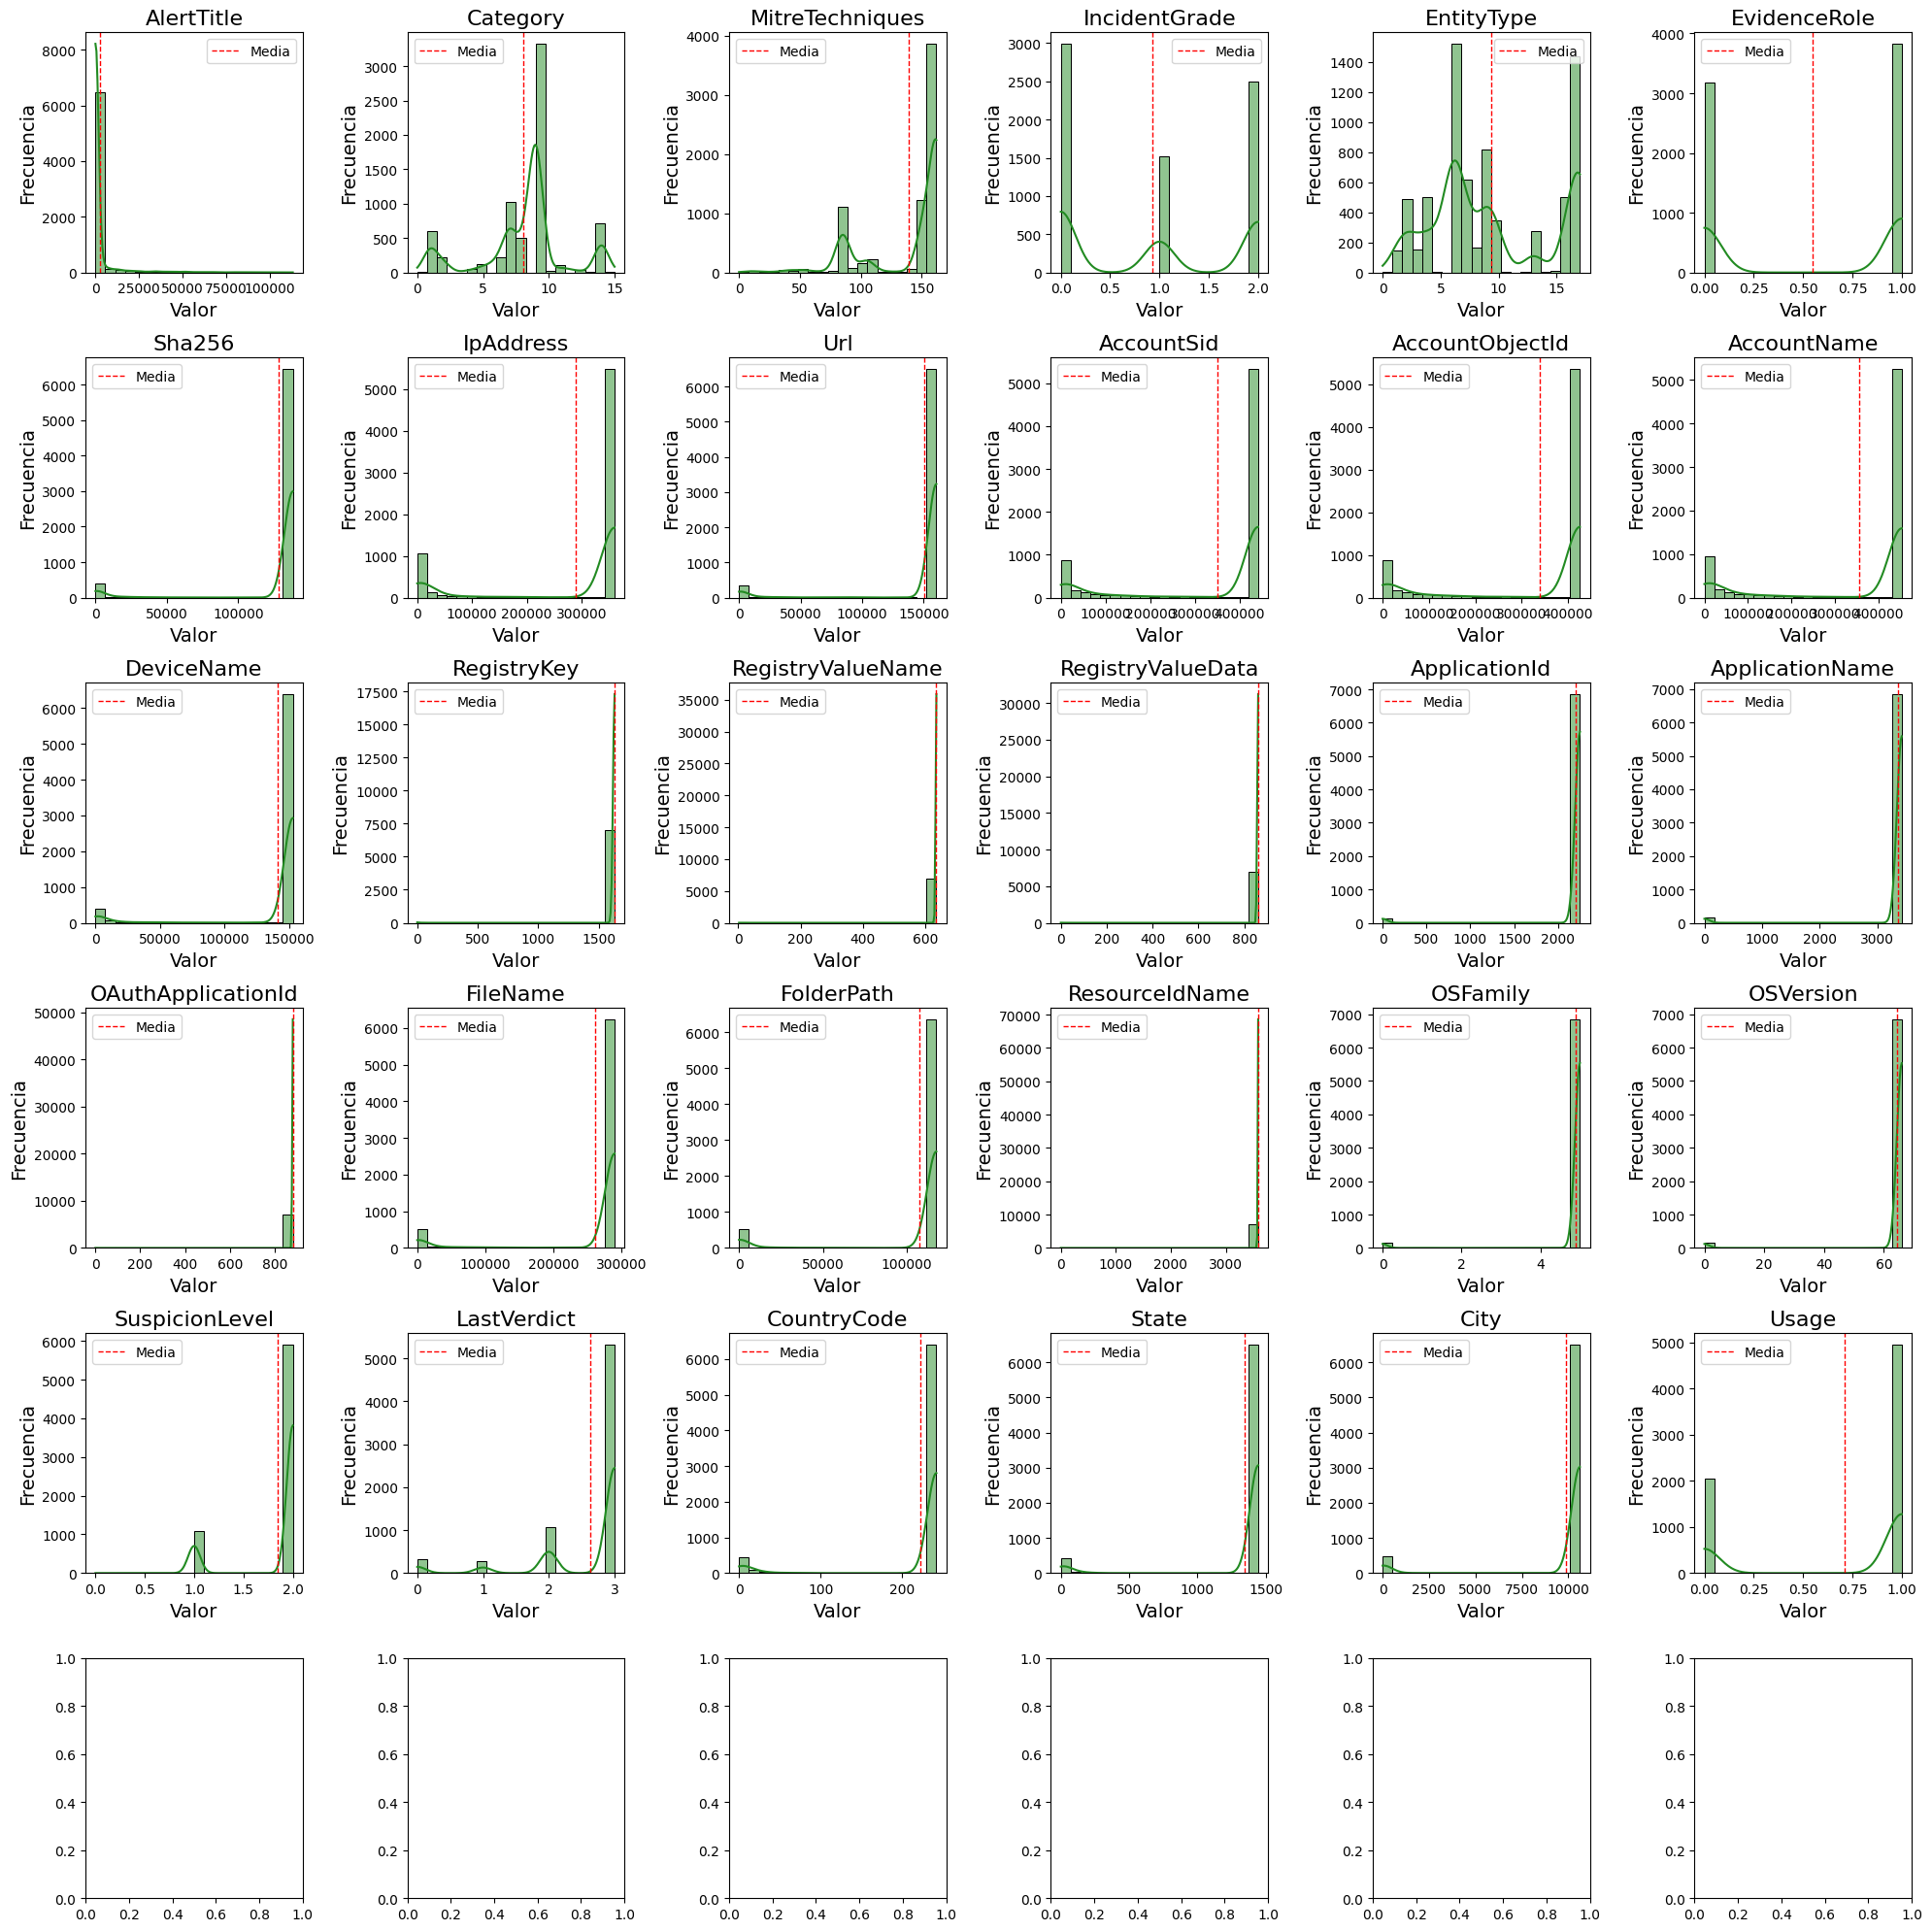

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(6, 6, figsize=(20, 20))

for i, c in enumerate(data_train.columns[1:]):  
    ax = axes.reshape(-1)[i]
    if data_train[c].dtype.kind == 'O':  
        sns.countplot(x=c, data=data_train, ax=ax)
    else:  
        sns.histplot(x=c, data=data_train, ax=ax, bins=20, kde=True, color="forestgreen")
        ax.set_title(c, fontsize=16)
        ax.set_xlabel('Valor', fontsize=14)
        ax.set_ylabel('Frecuencia', fontsize=14)

        mean = data_train[c].mean()
        median = data_train[c].median()
        ax.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Media')
        ax.legend()

plt.tight_layout()
plt.show()


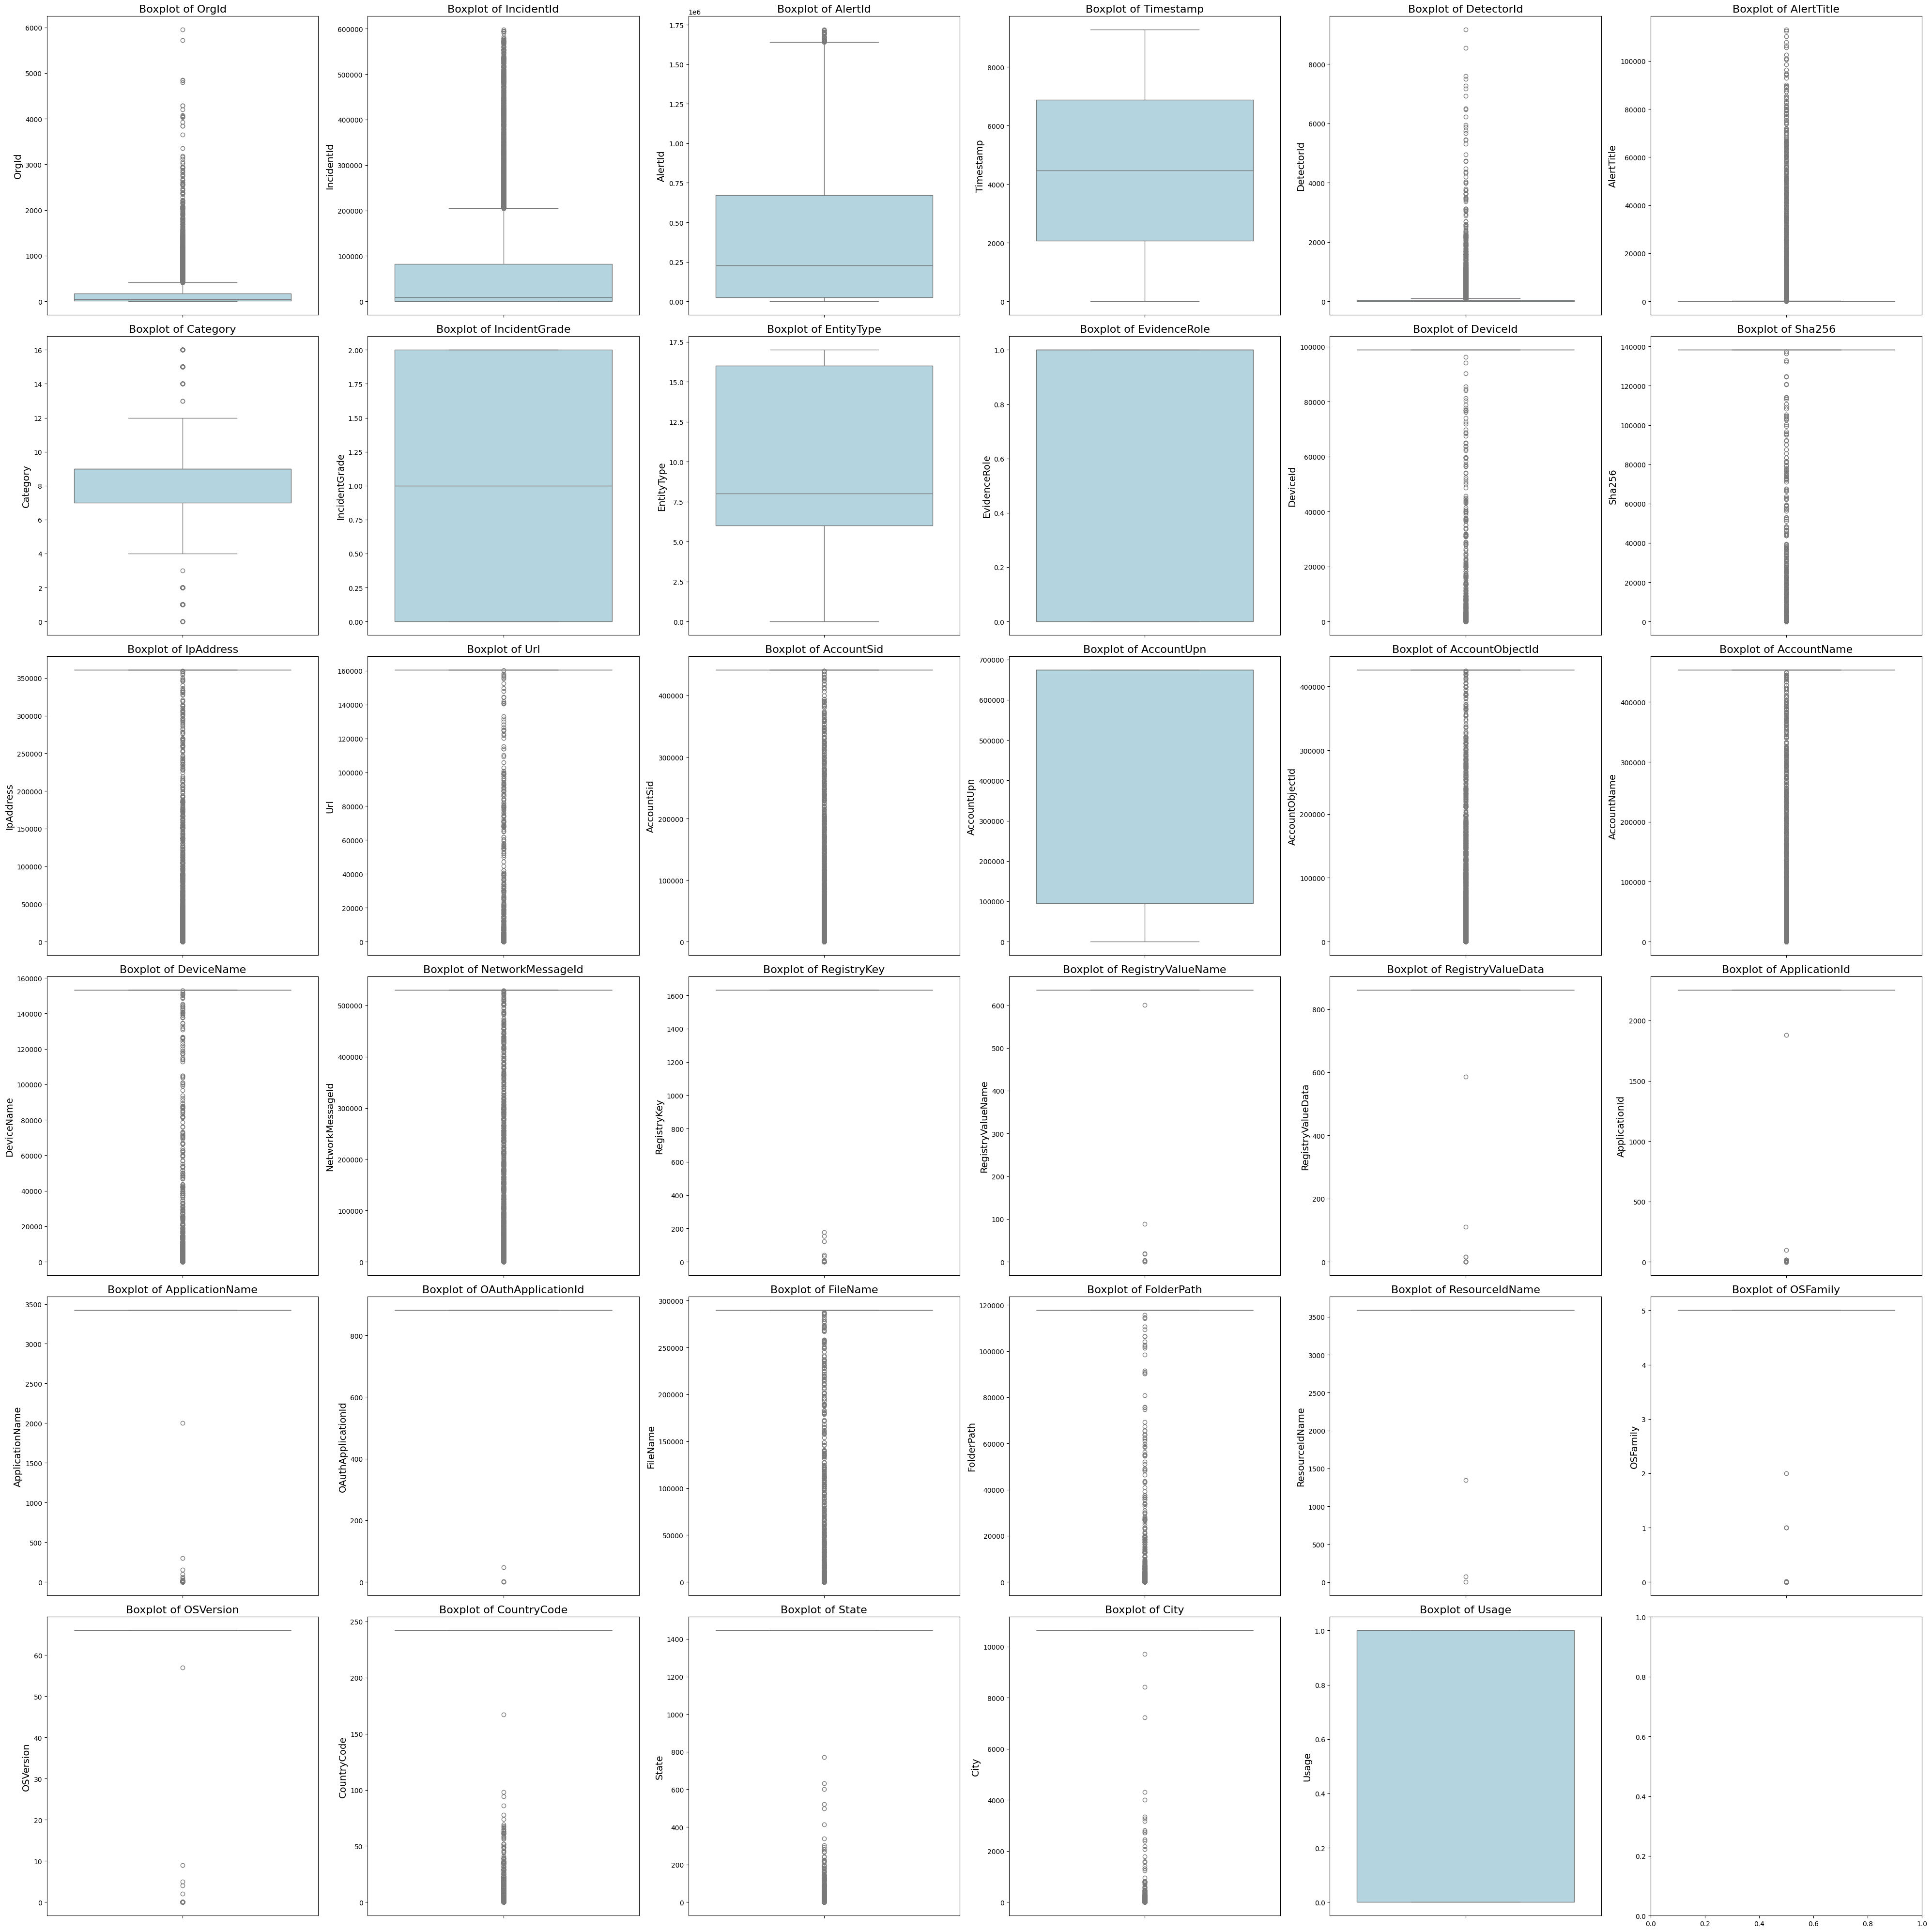

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(6, 6, figsize=(40, 40))

for i, c in enumerate(df_reduced_cleaned.columns[1:]):  
    ax = axes.reshape(-1)[i]  
    if df_reduced_cleaned[c].dtype.kind == 'O': 
        sns.boxplot(x=c, data=df_reduced_cleaned, ax=ax)
        ax.set_title(f'Boxplot of {c}', fontsize=16)
        ax.set_xlabel(c, fontsize=14)
    else: 
        sns.boxplot(y=c, data=df_reduced_cleaned, ax=ax, color="lightblue")
        ax.set_title(f'Boxplot of {c}', fontsize=16)
        ax.set_ylabel(c, fontsize=14)

plt.tight_layout()
plt.show()
